In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy

from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report
import sklearn.metrics as sk_metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC 
from sklearn.model_selection import GridSearchCV


from imblearn.datasets import fetch_datasets
from imblearn.pipeline import make_pipeline as make_pipeline_imb
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced

Using TensorFlow backend.


In [2]:
ifile = 'winequality-red.csv'
ifile1 = 'normalizedWineData.csv'

quality_df = pd.read_csv(ifile)
norm_df = pd.read_csv(ifile1)



In [3]:
quality_df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [4]:
norm_df['quality'].value_counts()

0.4    681
0.6    638
0.8    199
0.2     53
1.0     18
0.0     10
Name: quality, dtype: int64

In [5]:
list(norm_df.columns)

['Unnamed: 0',
 'fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality']

In [6]:
#Making binary classificaion for the response variable.
#Dividing wine as good and bad by giving the limit for the quality
bins = (0, .5, 1)
group_names = ['bad', 'good']
norm_df['catquality'] = pd.cut(norm_df['quality'], bins = bins, labels = group_names)

In [7]:
normx = norm_df.drop(['Unnamed: 0','quality','catquality'],axis=1)
qualx = quality_df.drop(['quality'],axis=1)
normy = quality_df['quality']
qualy = quality_df['quality']

In [8]:
norm_df = norm_df.dropna(axis = 0)
catnormx = norm_df.drop(['Unnamed: 0','quality','catquality'],axis=1)
catnormy = norm_df['catquality']

In [9]:
normy.value_counts(dropna = False)

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [10]:
norm_X_train, norm_X_test, norm_y_train, norm_y_test = train_test_split(normx, normy, random_state=1, stratify=normy)
qual_X_train, qual_X_test, qual_y_train, qual_y_test = train_test_split(qualx, qualy, random_state=1, stratify=qualy)
cat_X_train, cat_X_test, cat_y_train, cat_y_test = train_test_split(catnormx, catnormy, random_state=1, stratify=catnormy)

In [11]:
linear_regression = linear_model.LinearRegression()
logistic_regression = linear_model.LogisticRegression()
RF = RandomForestClassifier()
logR = linear_model.LogisticRegression
RF1 = RandomForestClassifier

In [12]:
linear_regression.fit(norm_X_train,norm_y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [13]:
predictions = linear_regression.predict(norm_X_test)
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(predictions, norm_y_test)
print(f"Stats")
print(f"Slope: {slope}, R: {r_value}, P: {p_value}, STE: {std_err}")

Stats
Slope: 1.0194588108258626, R: 0.6041634480049359, P: 3.705444083953583e-41, STE: 0.06739938853036725


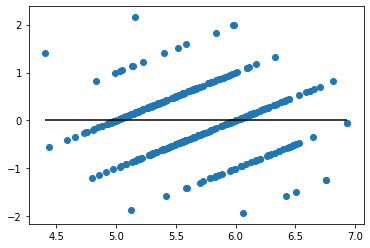

In [14]:
plt.scatter(predictions, predictions - norm_y_test)
plt.hlines(y=0, xmin=predictions.min(), xmax=predictions.max())
plt.show()

In [43]:
RF.fit(cat_X_train,cat_y_train)
predictions = RF.predict(cat_X_test)
# classification report
print("Normal Classification Report Random Forrest")
print(classification_report(cat_y_test, predictions))

Normal Classification Report Random Forrest
              precision    recall  f1-score   support

         bad       0.77      0.81      0.79       184
        good       0.83      0.79      0.81       214

    accuracy                           0.80       398
   macro avg       0.80      0.80      0.80       398
weighted avg       0.80      0.80      0.80       398



In [44]:
logistic_regression.fit(cat_X_train,cat_y_train)
predictions = logistic_regression.predict(cat_X_test)
# classification report
print("Normal Classification Report Logistic Regression")
print(classification_report(cat_y_test, predictions))

Normal Classification Report Logistic Regression
              precision    recall  f1-score   support

         bad       0.71      0.77      0.74       184
        good       0.79      0.73      0.76       214

    accuracy                           0.75       398
   macro avg       0.75      0.75      0.75       398
weighted avg       0.75      0.75      0.75       398



In [17]:
# classification report
print("Normal Classification Report ")
print(classification_report(cat_y_test, predictions))

Normal Classification Report
              precision    recall  f1-score   support

         bad       0.71      0.77      0.74       184
        good       0.79      0.73      0.76       214

    accuracy                           0.75       398
   macro avg       0.75      0.75      0.75       398
weighted avg       0.75      0.75      0.75       398



In [41]:
# Use SMOTE oversampling
smote_pipeline = make_pipeline_imb(SMOTE(random_state=42), RF1(random_state=42))
smote_model = smote_pipeline.fit(cat_X_train, cat_y_train)
smote_prediction = smote_model.predict(cat_X_test)
print("SMOTE Classification Report Random Forrest")
print(classification_report_imbalanced(cat_y_test, smote_prediction))
# Use SMOTE oversampling
smote_pipeline = make_pipeline_imb(SMOTE(random_state=42), logR(random_state=42))
smote_model = smote_pipeline.fit(cat_X_train, cat_y_train)
smote_prediction = smote_model.predict(cat_X_test)
print("SMOTE Classification Report Logistic Regression")
print(classification_report_imbalanced(cat_y_test, smote_prediction))


SMOTE Classification Report Random Forrest
                   pre       rec       spe        f1       geo       iba       sup

        bad       0.79      0.83      0.81      0.81      0.82      0.67       184
       good       0.84      0.81      0.83      0.83      0.82      0.67       214

avg / total       0.82      0.82      0.82      0.82      0.82      0.67       398

SMOTE Classification Report Logistic Regression
                   pre       rec       spe        f1       geo       iba       sup

        bad       0.69      0.82      0.69      0.75      0.75      0.57       184
       good       0.81      0.69      0.82      0.74      0.75      0.55       214

avg / total       0.76      0.75      0.76      0.75      0.75      0.56       398



In [42]:
# Use NearMiss undersampling
nearmiss_pipeline = make_pipeline_imb(NearMiss(), RF1(random_state=42))
nearmiss_model = nearmiss_pipeline.fit(cat_X_train, cat_y_train)
nearmiss_prediction = nearmiss_model.predict(cat_X_test)
print("Near Miss Classification Report Random Forrest")
print(classification_report_imbalanced(cat_y_test, nearmiss_prediction))
# Use NearMiss undersampling
nearmiss_pipeline = make_pipeline_imb(NearMiss(), logR(random_state=42))
nearmiss_model = nearmiss_pipeline.fit(cat_X_train, cat_y_train)
nearmiss_prediction = nearmiss_model.predict(cat_X_test)
print("Near Miss Classification Report Logistic Regression")
print(classification_report_imbalanced(cat_y_test, nearmiss_prediction))

Near Miss Classification Report Random Forrest
                   pre       rec       spe        f1       geo       iba       sup

        bad       0.76      0.79      0.79      0.78      0.79      0.63       184
       good       0.82      0.79      0.79      0.80      0.79      0.63       214

avg / total       0.79      0.79      0.79      0.79      0.79      0.63       398

Near Miss Classification Report Logistic Regression
                   pre       rec       spe        f1       geo       iba       sup

        bad       0.72      0.79      0.73      0.75      0.76      0.58       184
       good       0.80      0.73      0.79      0.77      0.76      0.57       214

avg / total       0.76      0.76      0.76      0.76      0.76      0.58       398



In [20]:
linear_regression.fit(qual_X_train,qual_y_train)
predicitons = linear_regression.predict(qual_X_test)
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(predictions, qual_y_test)
print(f"Stats")
print(f"Slope: {slope}, R: {r_value}, P: {p_value}, STE: {std_err}")

TypeError: unsupported operand type(s) for /: 'str' and 'int'

In [21]:
plt.scatter(predictions, predictions - qual_y_test)
plt.hlines(y=0, xmin=predictions.min(), xmax=predictions.max())
plt.show()

ValueError: operands could not be broadcast together with shapes (398,) (400,) 

In [22]:
normy.dtypes

dtype('int64')

In [23]:
norm_X_train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
1509,0.292035,0.041096,0.40,0.061644,0.062,0.084507,0.049470,0.295888,0.425197,0.221557,0.415385
706,0.212389,0.452055,0.08,0.075342,0.093,0.126761,0.045936,0.406021,0.519685,0.083832,0.246154
1071,0.256637,0.445205,0.20,0.493151,0.098,0.408451,0.303887,0.649780,0.362205,0.149701,0.123077
1292,0.115044,0.188356,0.13,0.102740,0.056,0.183099,0.077739,0.260646,0.692913,0.203593,0.615385
191,0.159292,0.171233,0.25,0.068493,0.074,0.281690,0.151943,0.538179,0.653543,0.173653,0.215385


In [45]:
classifiers = [
    SVC(),
    linear_model.SGDRegressor(),
    linear_model.BayesianRidge(),
    linear_model.LassoLars(alpha=.1),
    linear_model.ARDRegression(),
    linear_model.PassiveAggressiveRegressor(),
    linear_model.TheilSenRegressor(),
    linear_model.LinearRegression()]
classnames = [
    'SVC',
    'SGDRegressor',
    'Bayesian Ridge',
    'LassoLars',
    'ARDRegression',
    'PassiveAggressiveRegressor',
    'TheilSenRegressor',
    'Linear Regression'
]

In [46]:
predictions = classifiers[1].predict(norm_X_test)

NotFittedError: This SGDRegressor instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [47]:
plt.scatter(predictions, predictions - norm_y_test)
plt.hlines(y=0, xmin=predictions.min(), xmax=predictions.max())
plt.show()

ValueError: operands could not be broadcast together with shapes (398,) (400,) 

In [48]:
predictions = []
for x in classifiers:
    x.fit(norm_X_train,norm_y_train)
    predictions.append(x.predict(norm_X_test))

SVC Stats
Slope: 0.7512004744504616, R: 0.5329816819571364, P: 9.80898247439498e-31, STE: 0.0597774623906406

SGDRegressor Stats
Slope: 0.9581405134560481, R: 0.49063607483165944, P: 1.2798784258064493e-25, STE: 0.08529588824448286

Bayesian Ridge Stats
Slope: 1.0375389828372854, R: 0.6050123228755925, P: 2.68177624309035e-41, STE: 0.06844309271188415

LassoLars Stats
Slope: 0.48, R: 5.292093036745318e-16, P: 0.9999999999999916, STE: 45464480262458.39

ARDRegression Stats
Slope: 1.0309382292542981, R: 0.6051717731330667, P: 2.523479521932195e-41, STE: 0.06797939560798856

PassiveAggressiveRegressor Stats
Slope: 0.8316853534609533, R: 0.5744792794500208, P: 1.681702542992777e-36, STE: 0.059398021530694144

TheilSenRegressor Stats
Slope: 0.8653252890917783, R: 0.5742191427441002, P: 1.8385739272218456e-36, STE: 0.06184233147116124

Linear Regression Stats
Slope: 1.0194588108258626, R: 0.6041634480049359, P: 3.705444083953583e-41, STE: 0.06739938853036725



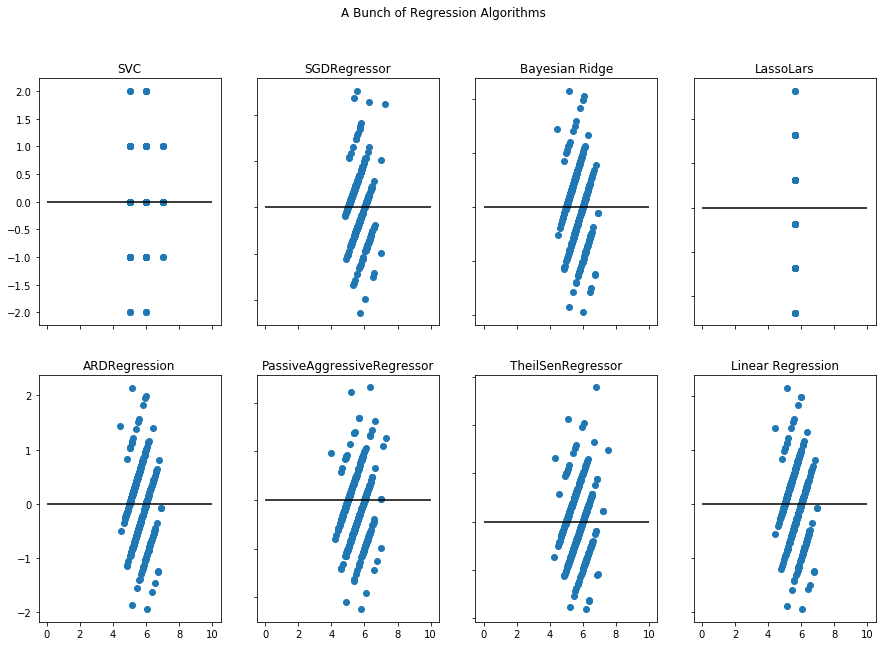

In [49]:
count1 = 0
count2 = 0
fig, ax = plt.subplots(2, 4)
for i in predictions:
    slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(predictions[count1], norm_y_test)
    print(f"{classnames[count1]} Stats")
    print(f"Slope: {slope}, R: {r_value}, P: {p_value}, STE: {std_err}")
    print(f"")
    fig.suptitle('A Bunch of Regression Algorithms')
    if (count1 < len(predictions)/2):
        ax[0][count1].scatter(predictions[count1], predictions[count1] - norm_y_test)
        ax[0][count1].hlines(y=0, xmin=0, xmax=10)
        ax[0][count1].set_title(classnames[count1])
    else:
        ax[1][count2].scatter(predictions[count1], predictions[count1] - norm_y_test)
        ax[1][count2].hlines(y=0, xmin=0, xmax=10)
        ax[1][count2].set_title(classnames[count1])
        count2 += 1
    count1 += 1

fig.set_size_inches(15,10)

for ax in fig.get_axes():
    ax.label_outer()

In [ ]:
1